<a href="https://colab.research.google.com/github/Resourcepaul/Project1/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Variable Name             | Description
--------------------------|---------------------------------------------------
Item_Identifier           | Unique product ID
Item_Weight	              | Weight of product
Item_Fat_Content	        | Whether the product is low fat or regular
Item_Visibility	          | The percentage of total display area of all products in a store allocated to the particular product
Item_Type        	        | The category to which the product belongs
Item_MRP	                | Maximum Retail Price (list price) of the product
Outlet_Identifier	        | Unique store ID
Outlet_Establishment_Year	| The year in which store was established
Outlet_Size	              | The size of the store in terms of ground area covered
Outlet_Location_Type	    | The type of area in which the store is located
Outlet_Type	              | Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales	        | Sales of the product in the particular store. This is the target variable to be predicted.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
report_df=pd.read_csv('/content/drive/MyDrive/Bootcamp/sales_predictions.csv')
report_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?

In [ ]:
#get rows and columns based on the shape of the data frame excluding the header
rows,columns=report_df.shape
#print rows
print(rows)
#print columns
print(columns)

8523
12


2) What are the datatypes of each variable?

In [ ]:
#show all information of the dataframe including the datatype
report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) Are there duplicates? If so, drop any duplicates.

In [ ]:
#automatically drop any duplicates based on identifiers and keeping only the first instance of the data entry
#automatically saves
report_df.drop_duplicates(keep='first',inplace=True)

4) Identify missing values.

In [ ]:
# using the .info() function i can identify null/missing values based on the non-null count
report_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [ ]:
# identify pattern of missing data

#all OUT010 are grocery stores and all grocery stores are small therefore all OUT010 are small
store1 = report_df['Outlet_Identifier']=='OUT010'
store_type= report_df['Outlet_Type']=='Grocery Store'

#all OUT035 are Location Tier 2 and all Tier 2 are small therefore all Tier2 are small
store2 = report_df['Outlet_Identifier']!='OUT035'
store_location= report_df['Outlet_Location_Type']=='Tier 2'

#filter out missing data
filter= report_df['Outlet_Size'].isna()

# get the sizes based on above filter
outlets=report_df.loc[store_type & ~filter,['Outlet_Size']]
outlets2=report_df.loc[store_location & ~filter,['Outlet_Size']]

# Fill OUT010 with value from above result
report_df.loc[store1 & report_df['Outlet_Size'].isna(),['Outlet_Size']]=outlets['Outlet_Size'].unique()

# Fill OUT045 with value from above result
report_df.loc[store2 & report_df['Outlet_Size'].isna(),['Outlet_Size']]=outlets2['Outlet_Size'].unique()

In [ ]:
# some items are duplicated therefore you can extract some of the missing data from existing entries

#create new df for the getting the data
report2_df=report_df.drop(columns=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales'])
report2_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518     True
8519     True
8520     True
8521     True
8522     True
Length: 8523, dtype: bool

In [ ]:
#remove missing data and duplicates in this oreder
report2_df.dropna(inplace=True)
report2_df.drop_duplicates(inplace=True)

# extract a dictionary using the item identifier as key and item weight as value
replace_value=report2_df.set_index('Item_Identifier').to_dict()['Item_Weight']

#map dictionary to df
report_df.Item_Weight = report_df.Item_Identifier.map(replace_value)
weight_missing = report_df['Item_Weight'].isna()

# unique items with missing data remain
#report_df.loc[weight_missing,['Item_Weight']]=report_df['Item_Weight'].mean()
report_df.loc[weight_missing,['Item_Weight']]

,Item_Weight
927,NaN
1922,NaN
4187,NaN
5022,NaN


In [ ]:
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer (strategy='mean')
report_df['Item_Weight']=imputer.fit_transform(report_df[['Item_Weight']])

6) Confirm that there are no missing values after addressing them.

In [ ]:
report_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [ ]:
#get unique values from column Item_Fat_Content
report_df['Item_Fat_Content']=report_df['Item_Fat_Content'].str.lower()
#make similar words uniform eg: LF and low fat to Low Fat
report_df=report_df.replace({'Item_Fat_Content':{'lf':'low fat','reg':'regular'}})

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [ ]:
report_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [ ]:
print(report_df.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.875420         0.066132   140.992782                1997.831867   
std       4.645008         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.785000         0.026989    93.826500                1987.000000   
50%      12.650000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


#Pairplot

generating pair plot to identify any correlation

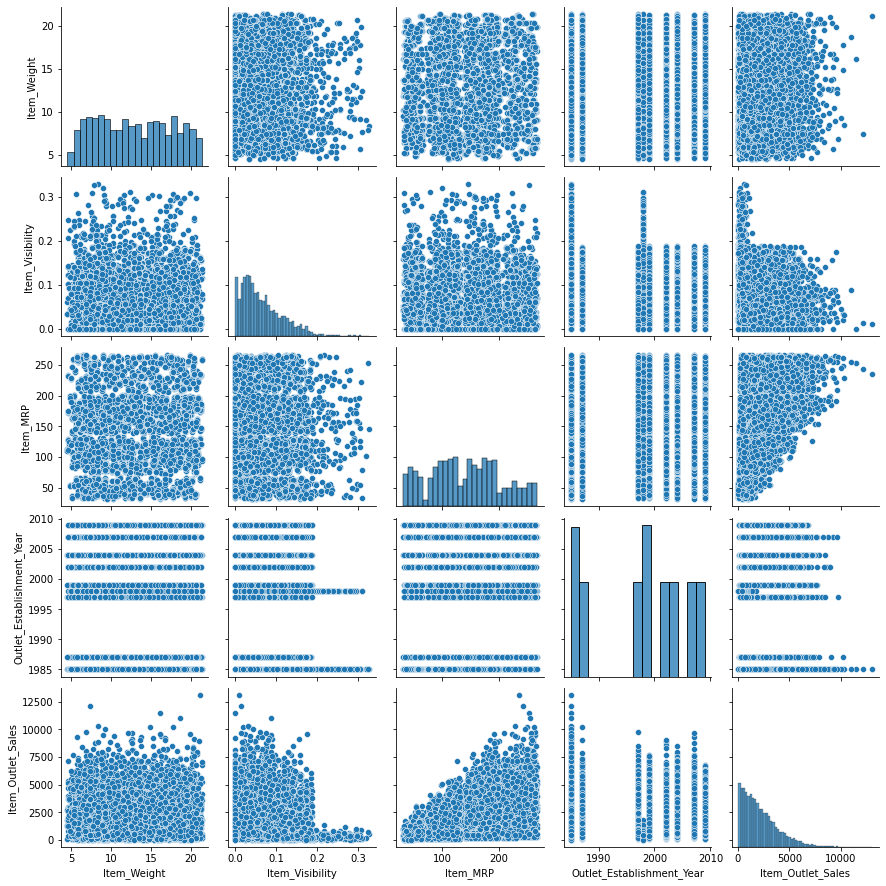

In [ ]:
sns.pairplot(report_df);

# Correlation heatmap

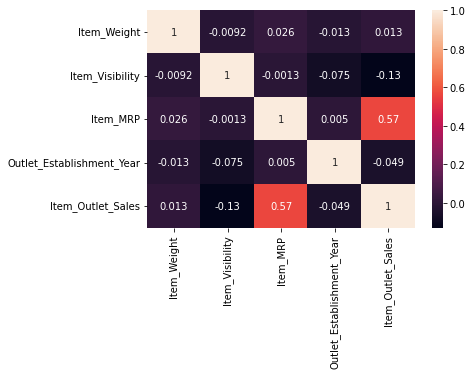

In [ ]:
sns.heatmap(data=report_df.corr(), annot=True);

#correlation between maximum retail price and total item sales per store

In [ ]:
per_store=report_df.groupby(['Outlet_Identifier','Item_MRP'])['Item_Outlet_Sales'].sum().reset_index()

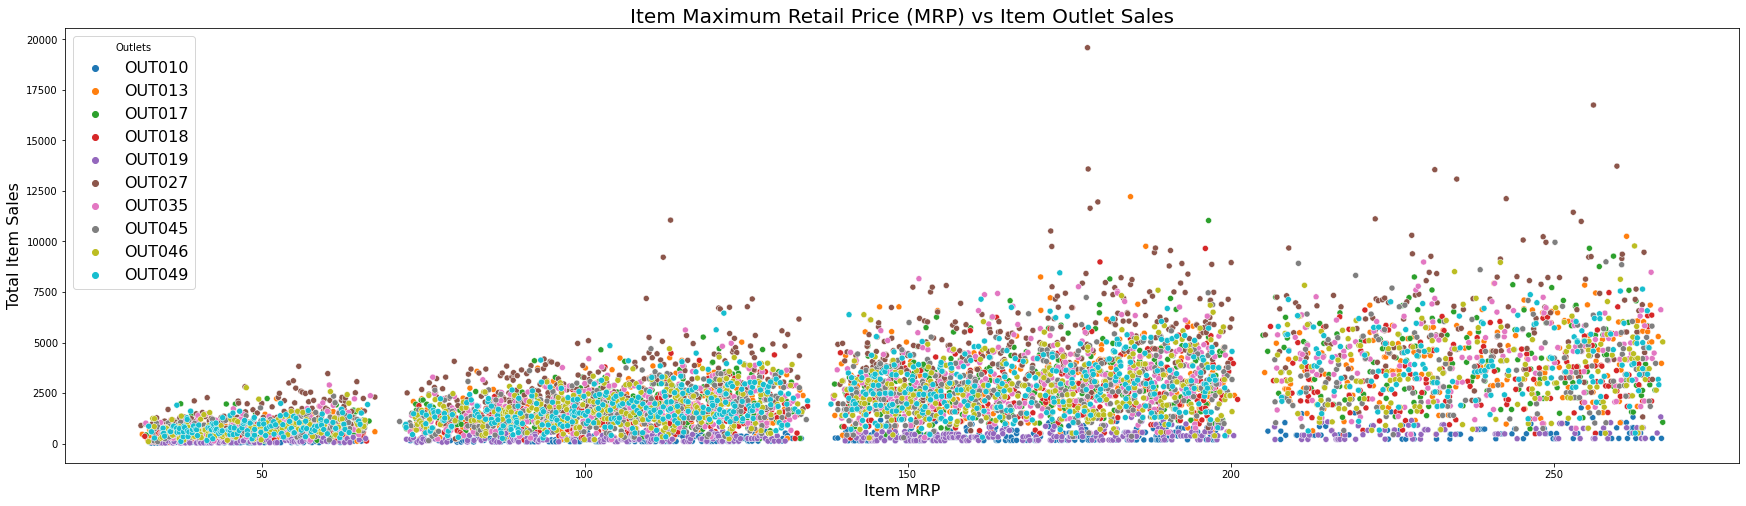

In [ ]:
plt.figure(figsize = (30,8))
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(data=per_store,x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Identifier');
plt.legend(title='Outlets', fontsize=16);
plt.xlabel('Item MRP', fontsize=16);
plt.ylabel('Total Item Sales', fontsize=16);
plt.title('Item Maximum Retail Price (MRP) vs Item Outlet Sales', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=10)

As the item Maximum retail price per store gets higher, it can be seen that some of the item sales per outlet gets higher as well regardless of store. However, you can also see that there are items despite having high MRP they do not have a high item sales for that outlet. this may be due to the item visibility, thus customer may not be able to see the item or due to fat content or item type preferences.

# visualization of item sales per item type

In [ ]:
item_sales_per_type_content=report_df.groupby(['Item_Type','Item_Fat_Content'])['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales')
item_sales_per_type=report_df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales')

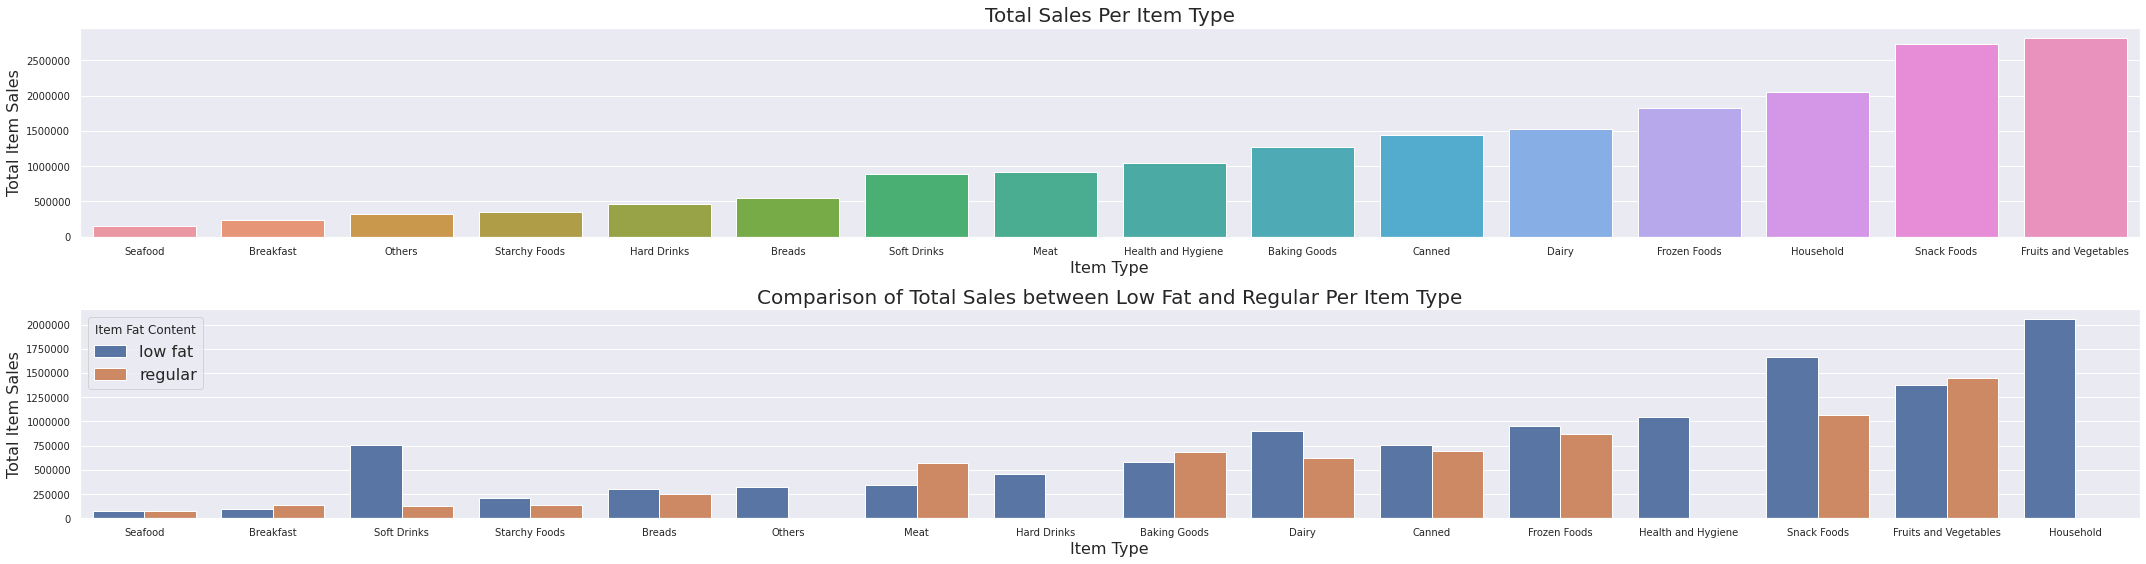

In [ ]:
sns.set()
fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (30,8))
axes[0].ticklabel_format(style='plain', axis='y')

sns.barplot(data=item_sales_per_type,x='Item_Type', y='Item_Outlet_Sales',ax=axes[0])
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_title('Total Sales Per Item Type', fontsize = 20);
axes[0].set_xlabel('Item Type', fontsize=16);
axes[0].set_ylabel('Total Item Sales', fontsize=16);
axes[0].tick_params(axis='both', which='major', labelsize=10)

sns.barplot(data=item_sales_per_type_content,x='Item_Type', y='Item_Outlet_Sales',hue='Item_Fat_Content',ax=axes[1])
axes[1].ticklabel_format(style='plain', axis='y')
axes[1].legend(title='Item Fat Content', fontsize=16);
axes[1].set_xlabel('Item Type', fontsize=16);
axes[1].set_ylabel('Total Item Sales', fontsize=16);
axes[1].set_title('Comparison of Total Sales between Low Fat and Regular Per Item Type', fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=10)
fig.tight_layout()

Shown in the first graph is the total sales per item type. on the second graph you can see the disttribution of total sales per item between low fat and regular products.

In [ ]:
report_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [ ]:
report_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,low fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [ ]:
#ordinal
print(report_df.Outlet_Size.value_counts())
print(report_df.Outlet_Location_Type.value_counts())

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


In [ ]:
#ordinal
size_dictionary = {'Small':0, 'Medium':1, 'High':2}
type_dictionary = {'Tier 1':0, 'Tier 2':1, 'Tier 3':2}
report_df['Outlet_Size'].replace(size_dictionary, inplace=True)
report_df['Outlet_Location_Type'].replace(type_dictionary, inplace=True)
print(report_df['Outlet_Size'])
print(report_df.Outlet_Location_Type)

0       1
1       1
2       1
3       0
4       2
       ..
8518    2
8519    0
8520    0
8521    1
8522    0
Name: Outlet_Size, Length: 8523, dtype: int64
0       0
1       2
2       0
3       2
4       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Name: Outlet_Location_Type, Length: 8523, dtype: int64


In [ ]:
X = report_df.drop(columns = ['Item_Outlet_Sales'])
y = report_df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe


Pipeline(steps=[('standardscaler', StandardScaler())])

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
col_transformer = make_column_transformer(number_tuple, category_tuple)
col_transformer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9d89fb410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9d89fb250>)])

In [ ]:
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9d89fb410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9d89fb250>)])

In [ ]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1588)




array([[ 0.73647765, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49911253, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12666824,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00621073, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.59962353, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.73647765, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Linear Regression
* Build a linear regression model.
* Evaluate the performance of your model based on r^2.
* Evaluate the performance of your model based on rmse.

In [ ]:
reg = LinearRegression()
reg.fit(X_train_processed,y_train)

LinearRegression()

In [ ]:
# To obtain the predictions of the train set
train_preds = reg.predict(X_train_processed)
# To obtain the predictions of the test set
test_preds = reg.predict(X_test_processed)

In [ ]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
print(r2_train)
print(r2_test)

0.6716893418072016
-2.2655541117041787e+20


In [ ]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

985.7082987606152
25001224646982.414


# Decision Tree
* Build a simple regression tree model.
* Compare the performance of your model based on r^2.
* Compare the performance of your model based on rmse.  

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train_processed, y_train)
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.21522549281120784


In [ ]:
dec_tree.get_depth()

62

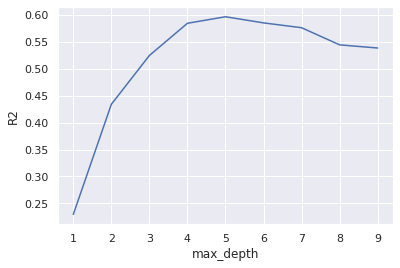

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)
    
# Visualize which max_depth leads to the highest r2 score
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42, max_depth=5)
dec_tree.fit(X_train_processed, y_train)
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.6042066848171654
0.5960564372160062


In [ ]:
# To obtain the predictions of the train set
train_preds = dec_tree.predict(X_train_processed)
# To obtain the predictions of the test set
test_preds = dec_tree.predict(X_test_processed)

In [ ]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

1082.281287111312
1055.6851402178304
